In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import os

# Create output directory
output_dir = '../OUTPUT'
os.makedirs(output_dir, exist_ok=True)

# Load dataset
data = pd.read_csv('../DATA/data.csv')

print("Dataset shape:", data.shape)
data.info()

Dataset shape: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  p

# Data Cleaning

In [2]:
# Check missing values
print("Missing values per column:")
print(data.isnull().sum())
print("\nTotal missing values:", data.isnull().sum().sum())

Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Check for duplicate rows
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


In [5]:
# Drop unnecessary columns (id and Unnamed: 32)
columns_to_drop = ['id']
if 'Unnamed: 32' in data.columns:
    columns_to_drop.append('Unnamed: 32')

data = data.drop(columns=columns_to_drop, axis=1)
print(f"Columns dropped: {columns_to_drop}")
print(f"Remaining columns: {data.shape[1]}")

Columns dropped: ['id', 'Unnamed: 32']
Remaining columns: 31


In [6]:
# Check the target variable distribution
print("Target variable (diagnosis) distribution:")
print(data['diagnosis'].value_counts())
print("\nTarget variable percentages:")
print(data['diagnosis'].value_counts(normalize=True) * 100)

Target variable (diagnosis) distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target variable percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


## Outlier Detection

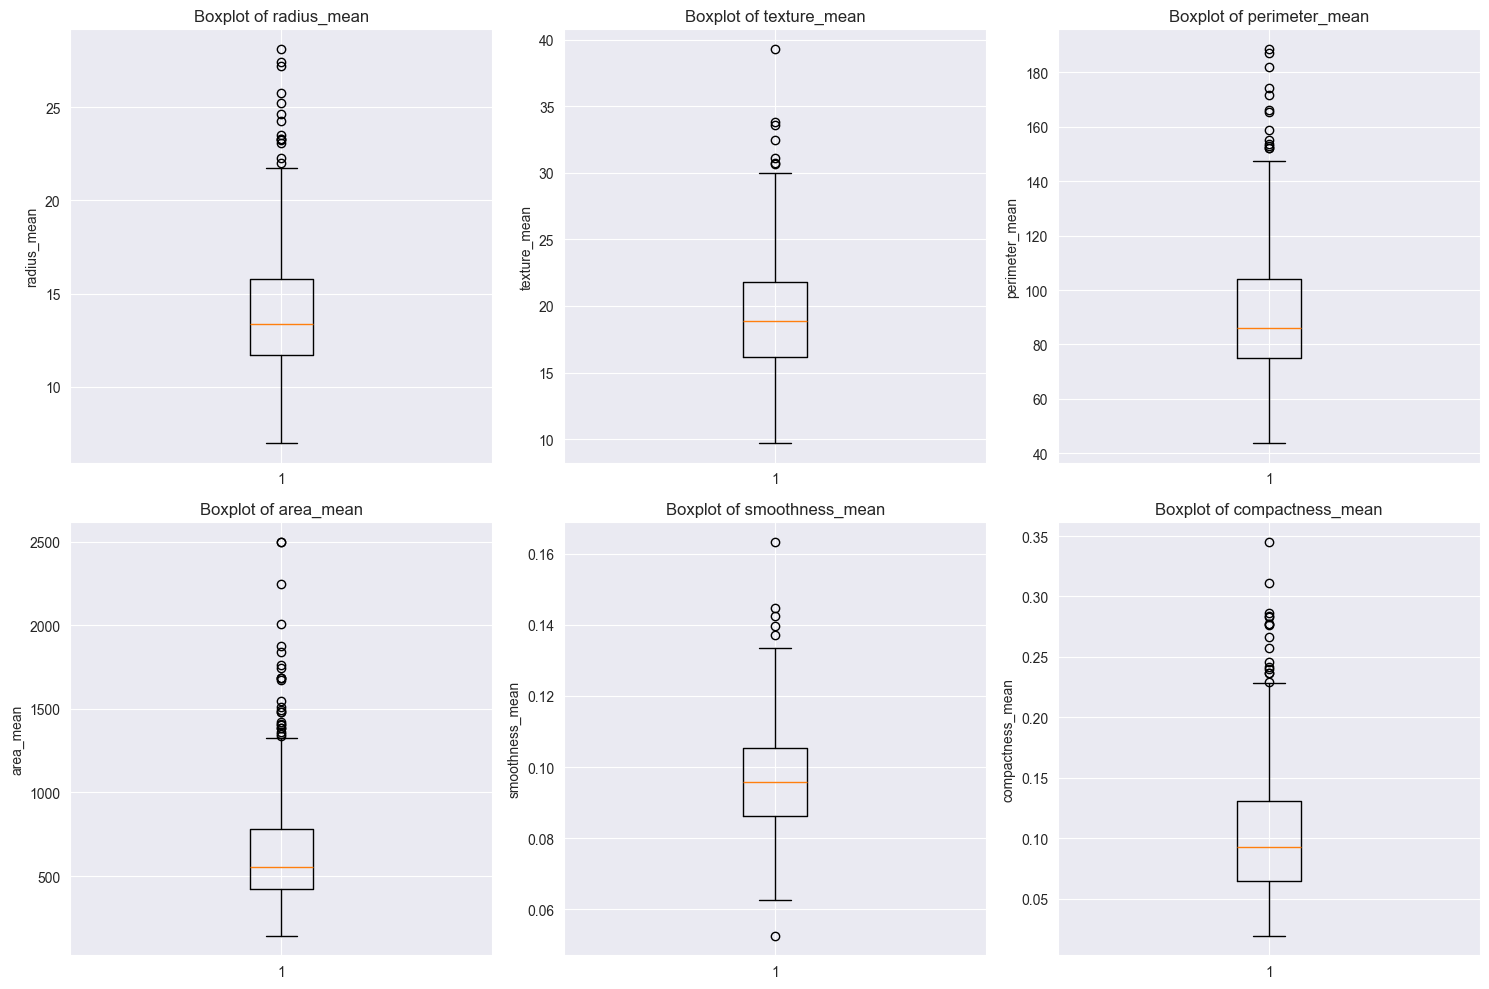

Outlier detection plot saved to ../OUTPUT/step1_outlier_detection.png


In [7]:
# Select key features for outlier detection
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    axes[idx].boxplot(data[feature])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True)

plt.tight_layout()
plt.savefig(f'{output_dir}/step1_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Outlier detection plot saved to {output_dir}/step1_outlier_detection.png")

# Data Analysis & Visualization

In [8]:
# Display descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Encode diagnosis: M (Malignant) = 1, B (Benign) = 0
print("Before encoding:")
print(data['diagnosis'].value_counts())

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

print("\nAfter encoding:")
print(data['diagnosis'].value_counts())

Before encoding:
diagnosis
B    357
M    212
Name: count, dtype: int64

After encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64


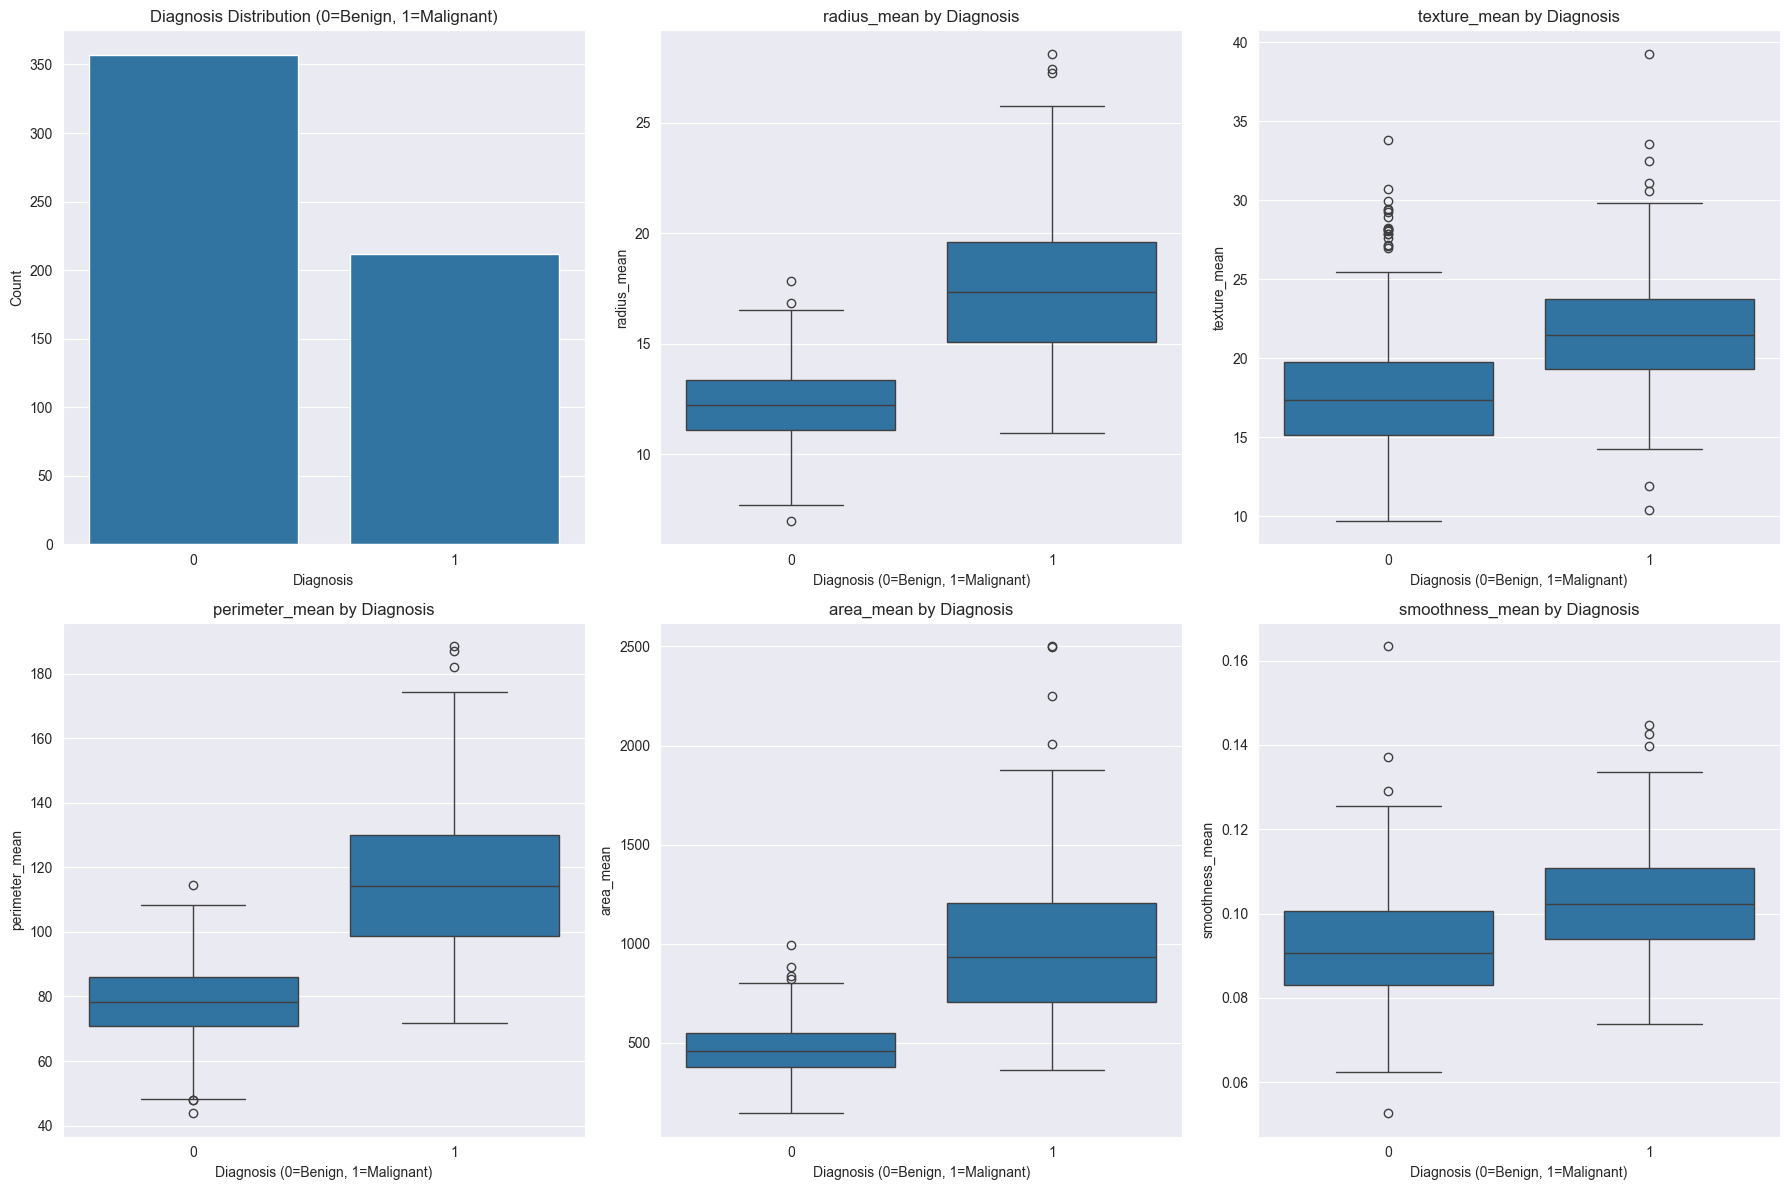

Feature distribution plot saved to ../OUTPUT/step2_feature_distribution.png


In [10]:
# Visualization of diagnosis distribution and key features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot 1: Diagnosis distribution
sns.countplot(data=data, x='diagnosis', ax=axes[0])
axes[0].set_title('Diagnosis Distribution (0=Benign, 1=Malignant)', fontsize=12)
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')

# Plot 2-6: Distribution of key features by diagnosis
key_features_viz = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for idx, feature in enumerate(key_features_viz, start=1):
    sns.boxplot(data=data, x='diagnosis', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Diagnosis', fontsize=12)
    axes[idx].set_xlabel('Diagnosis (0=Benign, 1=Malignant)')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
plt.savefig(f'{output_dir}/step2_feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Feature distribution plot saved to {output_dir}/step2_feature_distribution.png")

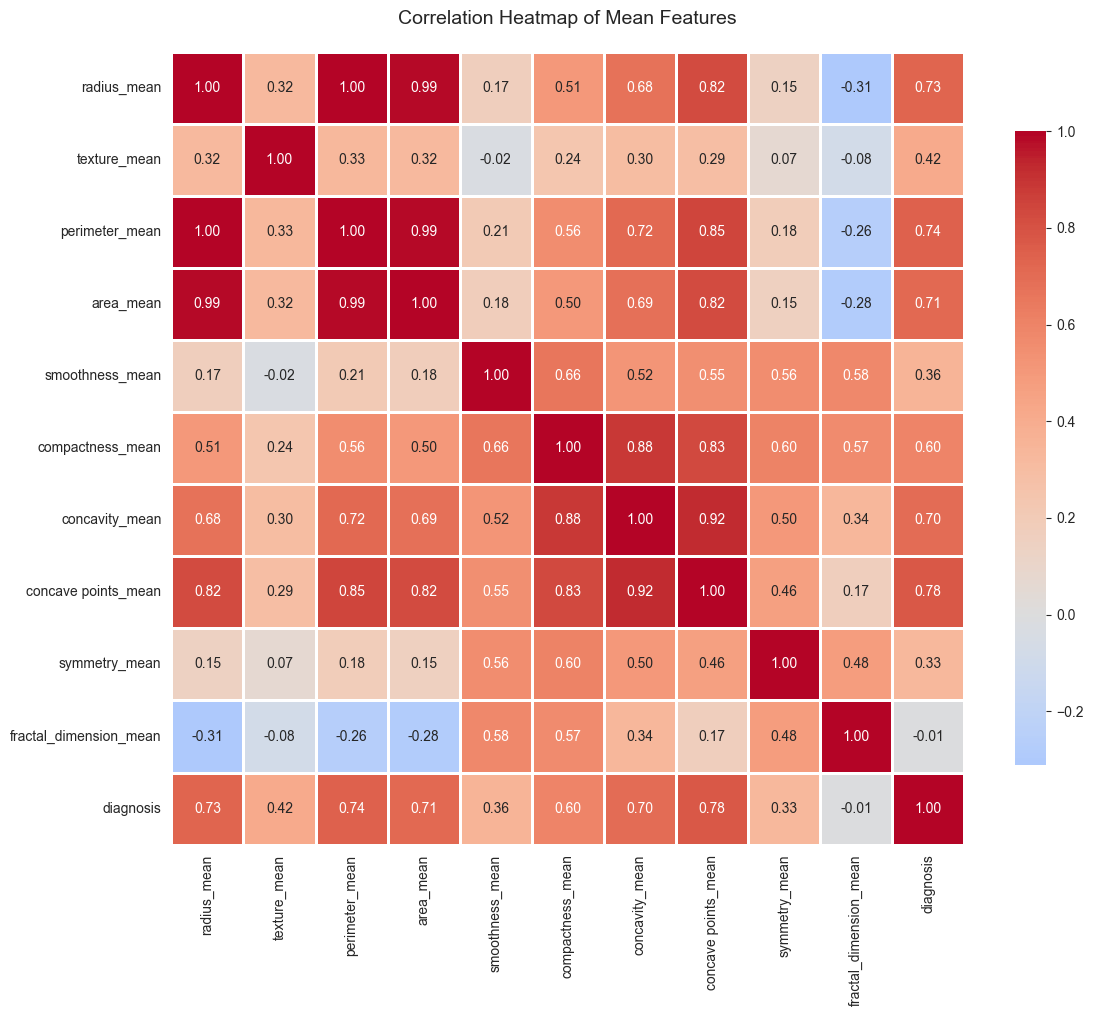

Correlation heatmap saved to ../OUTPUT/step3_correlation_heatmap.png


In [11]:
# Correlation heatmap for mean features
mean_features = [col for col in data.columns if 'mean' in col]
mean_features.append('diagnosis')

plt.figure(figsize=(12, 10))
correlation_matrix = data[mean_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Mean Features', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/step3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Correlation heatmap saved to {output_dir}/step3_correlation_heatmap.png")

# Data Scaling & Splitting

In [12]:
# Prepare features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [13]:
# Display feature columns
print("Feature columns:")
print(X.head())

Feature columns:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_wors

In [14]:
# Display target column
print("Target column:")
print(y.head())

Target column:
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nTrain set diagnosis distribution:")
print(y_train.value_counts())
print("\nTest set diagnosis distribution:")
print(y_test.value_counts())

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)

Train set diagnosis distribution:
diagnosis
0    285
1    170
Name: count, dtype: int64

Test set diagnosis distribution:
diagnosis
0    72
1    42
Name: count, dtype: int64


In [16]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Features scaled using StandardScaler
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)


# Classification Model

In [17]:
model = GaussianNB()

model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [18]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

print("Train Accuracy (NB): ", accuracy_score(y_train, train_predictions))
print("Test Accuracy (NB): ", accuracy_score(y_test, test_predictions))

Train Accuracy (NB):  0.945054945054945
Test Accuracy (NB):  0.9210526315789473


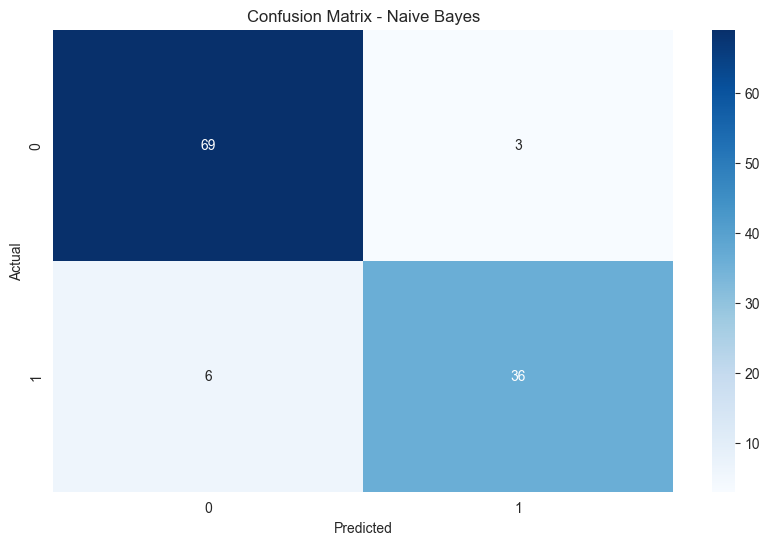

Confusion matrix saved to ../OUTPUT/step4_confusion_matrix.png


In [19]:
plt.figure(figsize=(10, 6))
cm_nb = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f'{output_dir}/step4_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Confusion matrix saved to {output_dir}/step4_confusion_matrix.png")

In [20]:
print("Classification Report - Naive Bayes:\n")
print(classification_report(y_test, test_predictions, target_names=['Benign', 'Malignant']))

Classification Report - Naive Bayes:

              precision    recall  f1-score   support

      Benign       0.92      0.96      0.94        72
   Malignant       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# Cross Validation

In [21]:
cv = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Naive Bayes Cross Validation Accuracy: ", cv.mean(), "+/-", cv.std(),)

print(f"Scores {cv}")
print(f"Mean {cv.mean()}")
print(f"Standard Deviation {cv.std()}")

Naive Bayes Cross Validation Accuracy:  0.9384615384615385 +/- 0.025630557779539778
Scores [0.92307692 0.98901099 0.92307692 0.92307692 0.93406593]
Mean 0.9384615384615385
Standard Deviation 0.025630557779539778
